In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Importing the data**

In [5]:
df=pd.read_csv(r'F:\Data_analysis_7\Earthquake\NepalEarhquakeDamage2015.csv')

This dataset is about Earthquake Damage in Nepal in 2015
There are 17 columns in the dataset

**building_id **: a unique identification number of the building

**district_id **: there are eleven districts. Okhaldhunga-12, Sindhuli-20, Ramechhap-21, Dolakha-22, Sindhupalchok-23, Kavrepalanchok-24, Nuwakot-29, Dhading-30, Makwanpur-31, Gorkha-36
count_floors_pre_eq: Number of floors that the building had before the earthquake

------------------------------------------------------------------------------------------------------------------------------------------------------------

Damage Grade 1 (DG1): Thin cracks in walls and falling of plaster or loose stones from the upper part of the building, few architectural repairs required.
Damage Grade 2 (DG2): Cracks, falling of plaster or stones in many sections, damage to non-structural parts such as chimneys, and projecting cornices, with no significant reduction in the load-bearing capacity of the building.
Damage Grade 3 (DG3): Large, extensive cracks and collapse of a small portion of non-load-bearing walls. Detachment of roof tiles, tilting or falling of chimneys, failure of individual non-structural elements such as partitions/gable walls, and delamination of stone/adobe walls. Partial reduction in the load-bearing capacity of structural members, significant repairs required.
Damage Grade 4 (DG4): Large gaps or collapse of walls and partial structural failure of floors/roofs, resulting in the building classified as dangerous.
Damage Grade 5 (DG5): Complete or near collapse.

-------------------------------------------------------------------------------------------------------------------------------------------------------------

count_floors_post_eq: Number of floors that the building had after the earthquake

age_building: Age of the building (in years)

plinth_area_sq_ft: Plinth area of the building (in square feet)

height_ft_pre_eq: Height of the building before the earthquake (in feet)

height_ft_post_eq: Height of the building after the earthquake (in feet)

land_surface_condition: Surface condition of the land in which the building is built

foundation_type: Type of foundation used in the building
roof_type: Type of roof used in the building

ground_floor_type: Ground floor type

other_floor_type: Type of construction used in other floors (except ground floor and roof)

position: Position of the building

plan_configuration: Building plan configuration

damage_grade: Damage grade assigned to the building by the surveyor after assessment



**Data basic**

In [6]:
df.shape

(762106, 17)

*Above conclude that data has 762106 row and 17 columns.*

In [7]:
df.head(5)

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
0,120101000011,12,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3
1,120101000021,12,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5
2,120101000031,12,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2
3,120101000041,12,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2
4,120101000051,12,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   building_id             762106 non-null  int64 
 1   district_id             762106 non-null  int64 
 2   count_floors_pre_eq     762106 non-null  int64 
 3   count_floors_post_eq    762106 non-null  int64 
 4   age_building            762106 non-null  int64 
 5   plinth_area_sq_ft       762106 non-null  int64 
 6   height_ft_pre_eq        762106 non-null  int64 
 7   height_ft_post_eq       762106 non-null  int64 
 8   land_surface_condition  762106 non-null  object
 9   foundation_type         762106 non-null  object
 10  roof_type               762106 non-null  object
 11  ground_floor_type       762106 non-null  object
 12  other_floor_type        762106 non-null  object
 13  position                762105 non-null  object
 14  plan_configuration      762105 non-n

from above we conclude different things like

In [9]:
df.columns  # shows all column

Index(['building_id', 'district_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'condition_post_eq', 'damage_grade'],
      dtype='object')

In [10]:
#Lets see the summary of numeric data using the describe method
df.describe()

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq
count,7.621060e+05,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,2.607514e+11,25.767835,2.087783,1.252058,24.326405,406.672576,16.049372,9.868817
std,5.801855e+10,5.807555,0.655101,1.063275,65.043704,226.779371,5.493878,8.574169
min,1.201010e+11,12.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000
25%,2.219090e+11,22.000000,2.000000,0.000000,9.000000,280.000000,12.000000,0.000000
50%,2.463020e+11,24.000000,2.000000,1.000000,16.000000,358.000000,16.000000,11.000000
75%,3.036080e+11,30.000000,2.000000,2.000000,27.000000,470.000000,18.000000,16.000000
max,3.667090e+11,36.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000


In [11]:
df.describe().astype('int')

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq
count,762106,762106,762106,762106,762106,762106,762106,762106
mean,-2147483648,25,2,1,24,406,16,9
std,-2147483648,5,0,1,65,226,5,8
min,-2147483648,12,1,0,0,70,6,0
25%,-2147483648,22,2,0,9,280,12,0
50%,-2147483648,24,2,1,16,358,16,11
75%,-2147483648,30,2,2,27,470,18,16
max,-2147483648,36,9,9,999,5000,99,99


In [12]:
list_cat=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position', 'plan_configuration', 'condition_post_eq']
df[list_cat].describe(include='all')

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq
count,762106,762106,762106,762106,762106,762105,762105,762106
unique,3,5,3,5,4,4,10,8
top,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used
freq,631675,628716,503748,618217,486907,604453,731257,207968


In [13]:
df['land_surface_condition'].value_counts(normalize=True)

Flat              0.828855
Moderate slope    0.138616
Steep slope       0.032530
Name: land_surface_condition, dtype: float64

In [14]:
df['land_surface_condition'].value_counts(normalize=False)

Flat              631675
Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64

In [15]:
df['foundation_type'].value_counts(normalize=True)*100

Mud mortar-Stone/Brick    82.497185
Bamboo/Timber              7.541339
Cement-Stone/Brick         5.149546
RC                         4.214637
Other                      0.597292
Name: foundation_type, dtype: float64

In [16]:
df['roof_type'].value_counts(normalize=True)

Bamboo/Timber-Light roof    0.660995
Bamboo/Timber-Heavy roof    0.280504
RCC/RB/RBC                  0.058501
Name: roof_type, dtype: float64

In [17]:
df['condition_post_eq'].value_counts(normalize=True)*100

Damaged-Not used                           27.288592
Damaged-Rubble unclear                     16.487208
Damaged-Used in risk                       16.250889
Damaged-Repaired and used                  14.144620
Damaged-Rubble clear                       13.409027
Not damaged                                 8.022375
Damaged-Rubble Clear-New building built     4.347164
Covered by landslide                        0.050124
Name: condition_post_eq, dtype: float64

In [18]:
df.isnull().sum()

building_id                0
district_id                0
count_floors_pre_eq        0
count_floors_post_eq       0
age_building               0
plinth_area_sq_ft          0
height_ft_pre_eq           0
height_ft_post_eq          0
land_surface_condition     0
foundation_type            0
roof_type                  0
ground_floor_type          0
other_floor_type           0
position                   1
plan_configuration         1
condition_post_eq          0
damage_grade              12
dtype: int64

Here above we see null values in position(1),plan_configuration(1),damage_grade(12).This must be resolve for further model training process

In [19]:
df.dtypes

building_id                int64
district_id                int64
count_floors_pre_eq        int64
count_floors_post_eq       int64
age_building               int64
plinth_area_sq_ft          int64
height_ft_pre_eq           int64
height_ft_post_eq          int64
land_surface_condition    object
foundation_type           object
roof_type                 object
ground_floor_type         object
other_floor_type          object
position                  object
plan_configuration        object
condition_post_eq         object
damage_grade              object
dtype: object

In [20]:
df

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
0,120101000011,12,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3
1,120101000021,12,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5
2,120101000031,12,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2
3,120101000041,12,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2
4,120101000051,12,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,2,0,60,165,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,Damaged-Rubble clear,Grade 5
762102,366709001251,36,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,Damaged-Rubble clear,Grade 5
762103,366709001261,36,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Rubble clear,Grade 5
762104,366709001271,36,2,0,19,306,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Rubble clear,Grade 5


Since, we know that object dataset take more memory space so lets its convert it into category dtypes


In [21]:
df['land_surface_condition']=df['land_surface_condition'].astype('category')
df['foundation_type']=df['foundation_type'].astype('category')
df['roof_type']=df['roof_type'].astype('category')
df['ground_floor_type']=df['ground_floor_type'].astype('category')
df['other_floor_type']=df['other_floor_type'].astype('category')
df['position']=df['position'].astype('category')
df['condition_post_eq']=df['condition_post_eq'].astype('category')
df['damage_grade']=df['damage_grade'].astype('category')
df['plan_configuration']=df['plan_configuration'].astype('category')

In [22]:
df.dtypes

building_id                  int64
district_id                  int64
count_floors_pre_eq          int64
count_floors_post_eq         int64
age_building                 int64
plinth_area_sq_ft            int64
height_ft_pre_eq             int64
height_ft_post_eq            int64
land_surface_condition    category
foundation_type           category
roof_type                 category
ground_floor_type         category
other_floor_type          category
position                  category
plan_configuration        category
condition_post_eq         category
damage_grade              category
dtype: object

# Null values

In [23]:
df.isnull().sum()

building_id                0
district_id                0
count_floors_pre_eq        0
count_floors_post_eq       0
age_building               0
plinth_area_sq_ft          0
height_ft_pre_eq           0
height_ft_post_eq          0
land_surface_condition     0
foundation_type            0
roof_type                  0
ground_floor_type          0
other_floor_type           0
position                   1
plan_configuration         1
condition_post_eq          0
damage_grade              12
dtype: int64

In [24]:
df.isnull().sum()/df.shape[0]*100

building_id               0.000000
district_id               0.000000
count_floors_pre_eq       0.000000
count_floors_post_eq      0.000000
age_building              0.000000
plinth_area_sq_ft         0.000000
height_ft_pre_eq          0.000000
height_ft_post_eq         0.000000
land_surface_condition    0.000000
foundation_type           0.000000
roof_type                 0.000000
ground_floor_type         0.000000
other_floor_type          0.000000
position                  0.000131
plan_configuration        0.000131
condition_post_eq         0.000000
damage_grade              0.001575
dtype: float64

The given dataset contain less null value .

In [25]:
df[df['position'].isnull()]

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
131652,212402000341,21,2,2,84,324,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,NaN,NaN,Damaged-Repaired and used,NaN


In [26]:
df[df['plan_configuration'].isnull()]

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
131652,212402000341,21,2,2,84,324,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,NaN,NaN,Damaged-Repaired and used,NaN


In [27]:
df[df['damage_grade'].isnull()]

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
83766,203202000521,20,1,0,999,155,10,0,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Repaired and used,NaN
131558,212402000211,21,2,2,22,456,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Used in risk,NaN
131579,212402000221,21,2,2,22,439,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Used in risk,NaN
131627,212402000071,21,2,2,4,456,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Used in risk,NaN
131629,212402000091,21,2,2,55,182,11,11,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Used in risk,NaN
131640,212402000201,21,2,2,3,528,15,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Used in risk,NaN
131652,212402000341,21,2,2,84,324,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,NaN,NaN,Damaged-Repaired and used,NaN
131654,212402000361,21,2,2,7,450,15,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Repaired and used,NaN
131655,212402000371,21,2,2,22,324,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Attached-1 side,Rectangular,Damaged-Repaired and used,NaN
131656,212402000381,21,2,2,11,360,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Repaired and used,NaN


# Working with null value

Null value :
* position
* plan_configuration
* damage_grade

In [28]:
df['position']=df['position'].fillna(method='ffill')
df['plan_configuration']=df['plan_configuration'].fillna(method='ffill')
df[df['position'].isnull()]
df

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
0,120101000011,12,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3
1,120101000021,12,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5
2,120101000031,12,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2
3,120101000041,12,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2
4,120101000051,12,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,2,0,60,165,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,Damaged-Rubble clear,Grade 5
762102,366709001251,36,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,Damaged-Rubble clear,Grade 5
762103,366709001261,36,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Rubble clear,Grade 5
762104,366709001271,36,2,0,19,306,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Rubble clear,Grade 5


In [29]:
df['damage_grade'] = df['damage_grade'].fillna(df['damage_grade'].mode()[0])

In [30]:
df.isnull().sum()

building_id               0
district_id               0
count_floors_pre_eq       0
count_floors_post_eq      0
age_building              0
plinth_area_sq_ft         0
height_ft_pre_eq          0
height_ft_post_eq         0
land_surface_condition    0
foundation_type           0
roof_type                 0
ground_floor_type         0
other_floor_type          0
position                  0
plan_configuration        0
condition_post_eq         0
damage_grade              0
dtype: int64

#   unique value

In [31]:
df['land_surface_condition'].unique()

['Flat', 'Moderate slope', 'Steep slope']
Categories (3, object): ['Flat', 'Moderate slope', 'Steep slope']

In [32]:
df['foundation_type'].unique()

['Other', 'Mud mortar-Stone/Brick', 'Cement-Stone/Brick', 'Bamboo/Timber', 'RC']
Categories (5, object): ['Bamboo/Timber', 'Cement-Stone/Brick', 'Mud mortar-Stone/Brick', 'Other', 'RC']

In [33]:
df['roof_type'].unique()

['Bamboo/Timber-Light roof', 'Bamboo/Timber-Heavy roof', 'RCC/RB/RBC']
Categories (3, object): ['Bamboo/Timber-Heavy roof', 'Bamboo/Timber-Light roof', 'RCC/RB/RBC']

In [34]:
df['ground_floor_type'].unique()

['Mud', 'Brick/Stone', 'RC', 'Timber', 'Other']
Categories (5, object): ['Brick/Stone', 'Mud', 'Other', 'RC', 'Timber']

In [35]:
df['other_floor_type'].unique()

['Not applicable', 'TImber/Bamboo-Mud', 'Timber-Planck', 'RCC/RB/RBC']
Categories (4, object): ['Not applicable', 'RCC/RB/RBC', 'TImber/Bamboo-Mud', 'Timber-Planck']

In [36]:
df['position'].unique()

['Not attached', 'Attached-1 side', 'Attached-2 side', 'Attached-3 side']
Categories (4, object): ['Attached-1 side', 'Attached-2 side', 'Attached-3 side', 'Not attached']

In [37]:
df['condition_post_eq'].unique()

['Damaged-Used in risk', 'Damaged-Repaired and used', 'Damaged-Rubble unclear', 'Not damaged', 'Damaged-Not used', 'Damaged-Rubble clear', 'Damaged-Rubble Clear-New building built', 'Covered by landslide']
Categories (8, object): ['Covered by landslide', 'Damaged-Not used', 'Damaged-Repaired and used', 'Damaged-Rubble Clear-New building built', 'Damaged-Rubble clear', 'Damaged-Rubble unclear', 'Damaged-Used in risk', 'Not damaged']

 # Duplicate values

In [38]:
df.duplicated().sum()

0

**Our dataset doesnot contain duplicated value**

In [39]:
df.shape

(762106, 17)

In [40]:
test=pd.concat([df,df],ignore_index=True)
test

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
0,120101000011,12,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3
1,120101000021,12,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5
2,120101000031,12,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2
3,120101000041,12,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2
4,120101000051,12,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524207,366709001241,36,2,0,60,165,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,Damaged-Rubble clear,Grade 5
1524208,366709001251,36,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,Damaged-Rubble clear,Grade 5
1524209,366709001261,36,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Rubble clear,Grade 5
1524210,366709001271,36,2,0,19,306,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Rubble clear,Grade 5


--------------------------------------------------------------------------------------

In [41]:
test.duplicated().sum()

762106

In [42]:
test.drop_duplicates().duplicated().sum()

0

In [43]:
test.duplicated().sum()

762106

In [44]:
test.drop_duplicates(subset=['foundation_type','position'],keep='first')

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
0,120101000011,12,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3
11,120101000121,12,2,2,15,528,21,21,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Not damaged,Grade 1
60,120102000011,12,3,3,30,375,24,24,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud,Attached-1 side,Rectangular,Damaged-Not used,Grade 3
196,120103000131,12,1,1,50,231,10,10,Flat,Cement-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Not used,Grade 3
367,120104000491,12,1,1,2,322,6,6,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Not damaged,Grade 1
1406,120209000511,12,2,2,22,356,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-2 side,Rectangular,Damaged-Repaired and used,Grade 2
1574,120302000011,12,3,0,2,1135,34,0,Flat,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Not attached,Rectangular,Damaged-Rubble clear,Grade 5
2677,120402000551,12,2,2,3,350,19,19,Flat,Cement-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Attached-1 side,Rectangular,Damaged-Not used,Grade 3
3341,120501000671,12,2,2,6,936,25,25,Moderate slope,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-1 side,Rectangular,Damaged-Used in risk,Grade 2
3349,120501000741,12,2,2,4,314,18,18,Flat,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-2 side,Rectangular,Damaged-Repaired and used,Grade 1



  
# Filter the data

In [45]:
df.sample(5)

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
743139,365009011851,36,1,1,16,625,9,9,Flat,RC,RCC/RB/RBC,RC,Not applicable,Not attached,Square,Not damaged,Grade 1
139250,213008000641,21,3,3,10,300,17,17,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Not used,Grade 3
135285,212702001401,21,2,2,10,390,22,22,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,Grade 2
319744,240403001391,24,3,3,26,134,18,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,Damaged-Not used,Grade 4
320085,240405001061,24,2,2,17,380,16,16,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 3


In [46]:
df[df['building_id']==203201000431]

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
83632,203201000431,20,2,2,3,450,16,16,Flat,Bamboo/Timber,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,Grade 4


In [47]:
df.query('building_id==203201000431')

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
83632,203201000431,20,2,2,3,450,16,16,Flat,Bamboo/Timber,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,Grade 4


In [48]:
df[(df['damage_grade']=='Grade 4') & (df['district_id']==12)]

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
35,120101000331,12,2,2,82,464,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,Grade 4
36,120101000341,12,2,2,20,400,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 4
40,120101000371,12,2,2,30,392,17,17,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 4
50,120101000451,12,2,2,15,336,15,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,Grade 4
54,120101000481,12,2,2,16,286,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39344,125609000461,12,2,1,2,458,13,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 4
39349,125609000511,12,2,5,30,458,12,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 4
39357,125609000591,12,2,2,13,389,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 4
39359,125609000611,12,2,2,16,380,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 4


In [49]:
df.sample(5)

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
755442,366201000201,36,2,2,25,442,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,Grade 3
124623,211609000531,21,2,2,30,300,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 4
44252,200609000081,20,2,0,15,290,25,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Rubble unclear,Grade 5
112491,210405000601,21,2,2,2,318,16,16,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 4
514702,300605001091,30,2,2,25,350,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-2 side,Rectangular,Damaged-Used in risk,Grade 4


In [50]:
df.query('(age_building>=5) and (damage_grade == "Grade 5")')


,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
1,120101000021,12,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5
6,120101000071,12,1,0,13,234,9,0,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Rubble unclear,Grade 5
39,120102000161,12,1,0,60,348,12,0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Rubble unclear,Grade 5
44,120101000391,12,2,1,40,288,15,6,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,Grade 5
61,120302000861,12,2,0,20,336,21,0,Steep slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Rubble clear,Grade 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,2,0,60,165,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,Damaged-Rubble clear,Grade 5
762102,366709001251,36,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,Damaged-Rubble clear,Grade 5
762103,366709001261,36,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Rubble clear,Grade 5
762104,366709001271,36,2,0,19,306,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Rubble clear,Grade 5


# # Data visualization

In [51]:
df.sample(5)

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
46469,200902000931,20,2,2,42,711,17,17,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 4
199989,222706010071,22,3,0,20,405,21,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Rubble clear,Grade 5
546041,302404000351,30,3,3,50,391,21,21,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,Grade 3
494623,290507000061,29,2,2,2,350,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Attached-1 side,Rectangular,Damaged-Not used,Grade 4
695118,361106000171,36,2,2,30,326,15,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Square,Damaged-Used in risk,Grade 4


<Axes: >

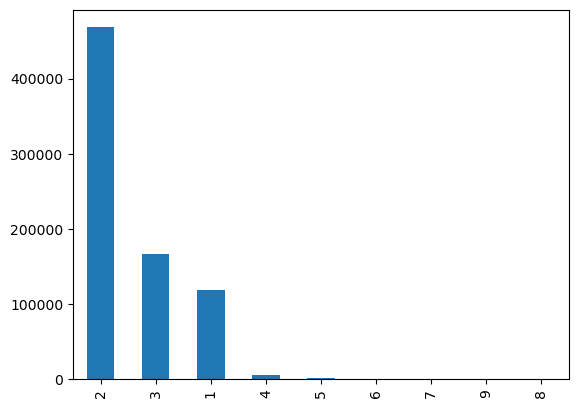

In [52]:
df['count_floors_pre_eq'].value_counts().sort_values(ascending=False).plot(kind='bar')

Its show that maximum building has 2 floors  and minimum house has 6 floor pre earthquake

In [53]:
df.columns

Index(['building_id', 'district_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'condition_post_eq', 'damage_grade'],
      dtype='object')

<Axes: ylabel='count_floors_pre_eq'>

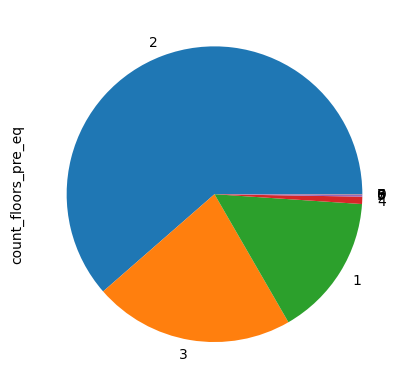

In [54]:
df['count_floors_pre_eq'].value_counts().plot(kind='pie')

<Axes: >

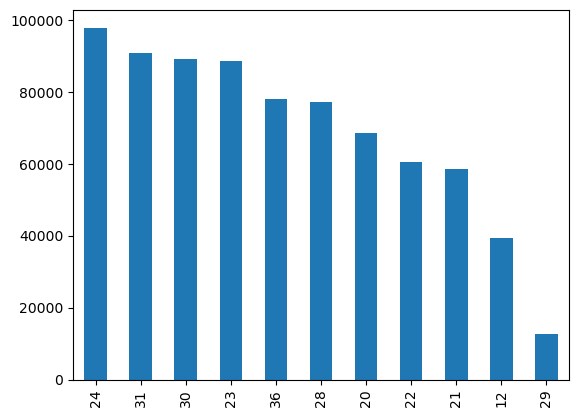

In [55]:
df['district_id'].value_counts().sort_values(ascending=False).plot(kind='bar')

*district_id *: there are eleven districts. Okhaldhunga-12, Sindhuli-20, Ramechhap-21, Dolakha-22, Sindhupalchok-23, Kavrepalanchok-24, Nuwakot-29, Dhading-30, Makwanpur-31, Gorkha-36 count_floors_pre_eq: Number of floors that the building had before the earthquake

Maximum data is taken from Kavrepalanchok-24 and minimum data contain from Nuwakot-29

<Axes: ylabel='district_id'>

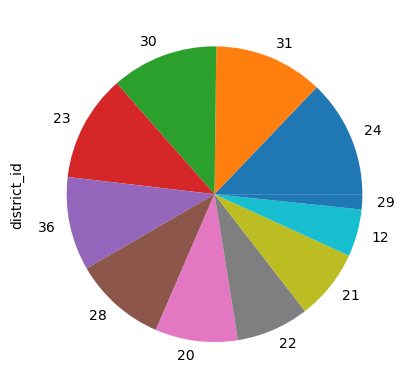

In [56]:
df['district_id'].value_counts().plot(kind='pie')

<Axes: >

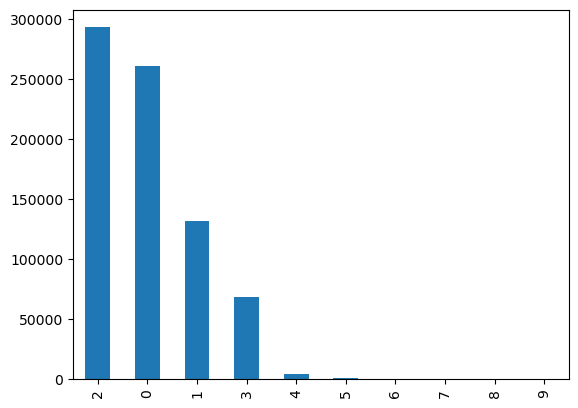

In [57]:
df['count_floors_post_eq'].value_counts().plot(kind='bar')

After earthquake the 2 floor is more and less number of house with 6 floors

['building_id', 'district_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'condition_post_eq', 'damage_grade'],
      dtype='object')

In [58]:
import seaborn as sns


In [59]:
df['land_surface_condition'].value_counts()

Flat              631675
Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64

<Axes: xlabel='land_surface_condition', ylabel='count'>

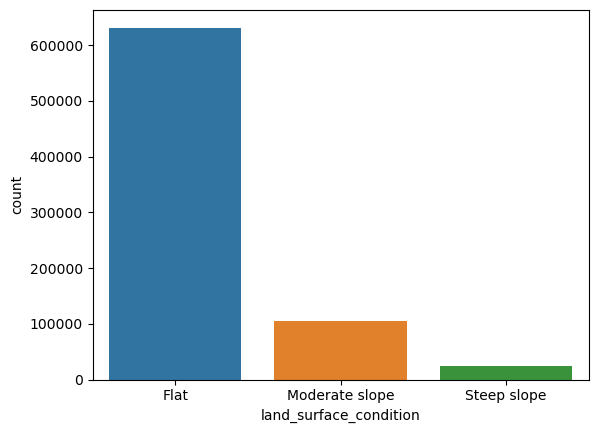

In [60]:
sns.countplot(df,x='land_surface_condition')

Its show that maximium building was build in flat surface around 63,1675
,Moderate slope around 105640 and Steep slope around 24791

<Axes: >

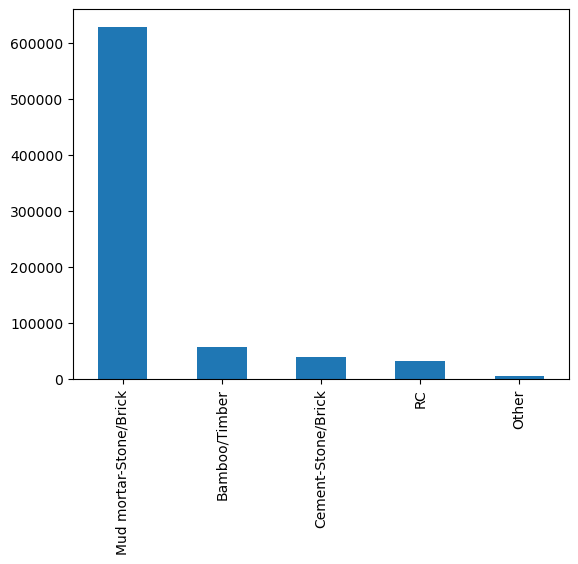

In [61]:
df['foundation_type'].value_counts().plot(kind='bar')

Its gives following output
* Maximum house foundation is made of Mud mortar-stone/Brick

<Axes: xlabel='position', ylabel='count'>

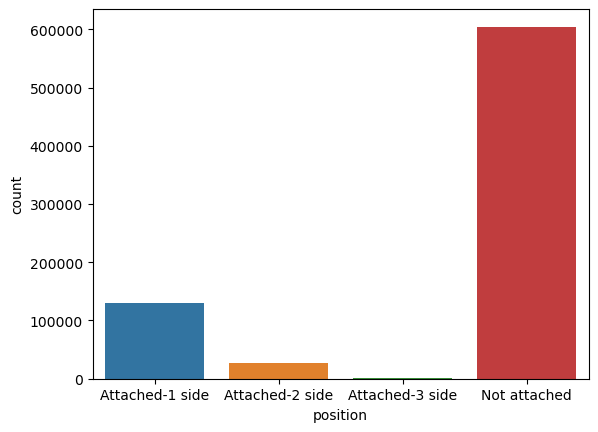

In [62]:
sns.countplot(df,x='position')

* Maximum building arenot attached to another building
* Less no of building are attached-3 side

<Axes: >

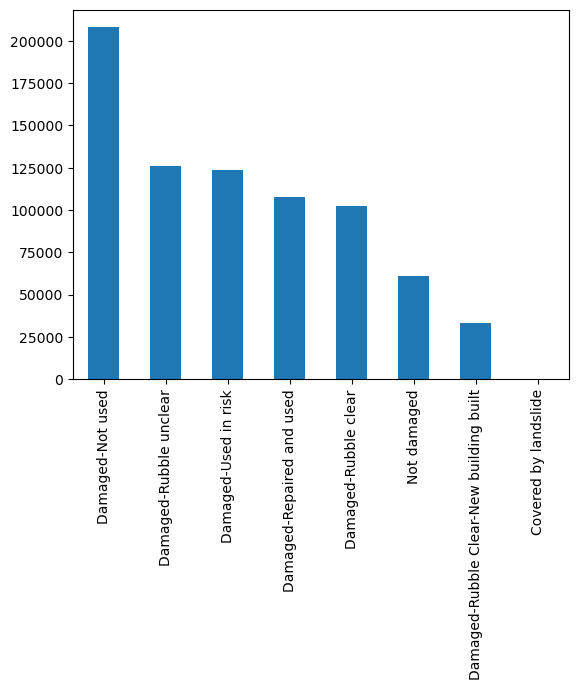

In [63]:
df['condition_post_eq'].value_counts().plot(kind='bar')

In [64]:
df['condition_post_eq'].value_counts()

Damaged-Not used                           207968
Damaged-Rubble unclear                     125650
Damaged-Used in risk                       123849
Damaged-Repaired and used                  107797
Damaged-Rubble clear                       102191
Not damaged                                 61139
Damaged-Rubble Clear-New building built     33130
Covered by landslide                          382
Name: condition_post_eq, dtype: int64

* After earthquake damaged building are not used in maximum district
* People still are using the damaged house in risk
* few house are built new
* less number of house has been covered by landslide


<Axes: xlabel='damage_grade', ylabel='count'>

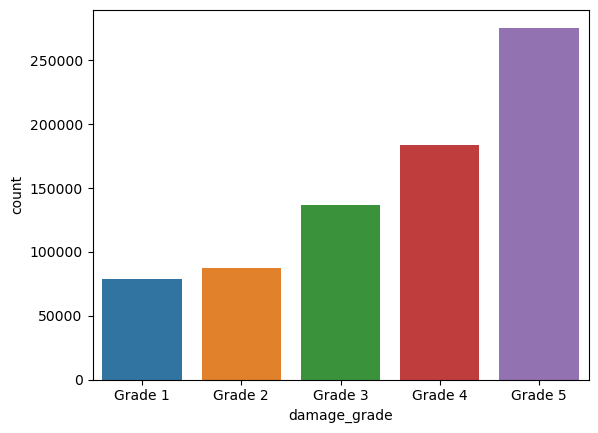

In [65]:
sns.countplot(df,x='damage_grade')


 Conclusion:
* Maximum house are completer or near collapse,


# Boxplot

In [66]:
df.sample()

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
660994,313201000091,31,2,2,50,442,15,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Not damaged,Grade 1


<Axes: >

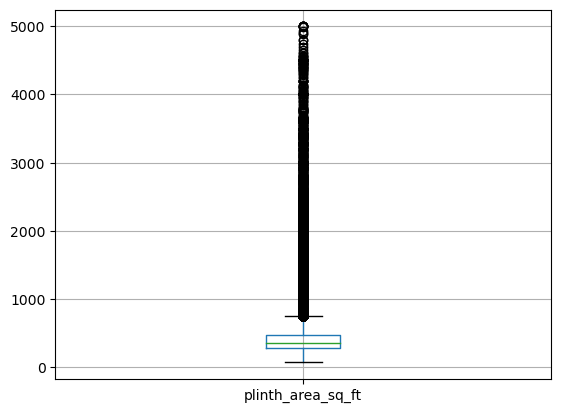

In [67]:
df[['plinth_area_sq_ft']].boxplot()

<Axes: >

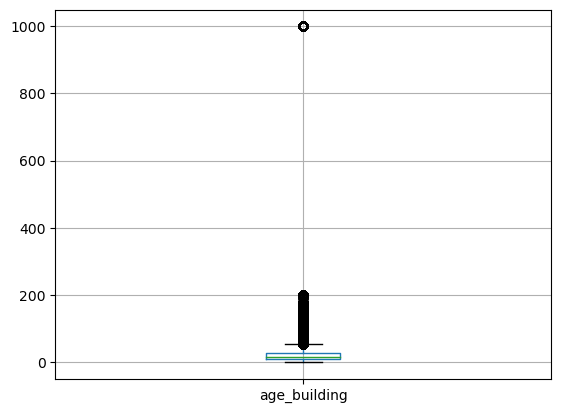

In [68]:
df[['age_building']].boxplot()

<Axes: >

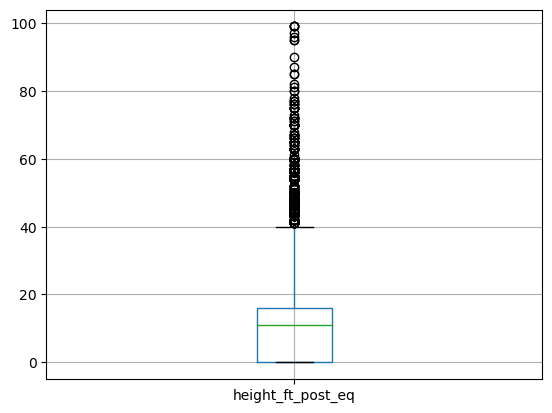

In [69]:
df[['height_ft_post_eq']].boxplot()

# Correlation Plot

In [70]:
df.corr(numeric_only=True)

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq
building_id,1.000000,0.999426,-0.107550,-0.056481,0.020403,0.038111,-0.041748,-0.032179
district_id,0.999426,1.000000,-0.108642,-0.055329,0.020131,0.038260,-0.043449,-0.031333
count_floors_pre_eq,-0.107550,-0.108642,1.000000,0.263945,0.047084,0.102371,0.711189,0.190655
count_floors_post_eq,-0.056481,-0.055329,0.263945,1.000000,-0.003987,0.138072,0.261778,0.937868
age_building,0.020403,0.020131,0.047084,-0.003987,1.000000,-0.008500,0.036402,-0.007145
plinth_area_sq_ft,0.038111,0.038260,0.102371,0.138072,-0.008500,1.000000,0.203800,0.195985
height_ft_pre_eq,-0.041748,-0.043449,0.711189,0.261778,0.036402,0.203800,1.000000,0.375297
height_ft_post_eq,-0.032179,-0.031333,0.190655,0.937868,-0.007145,0.195985,0.375297,1.000000


In [71]:
df.corr(numeric_only=True)['height_ft_pre_eq'].apply(lambda x:abs(x)).sort_values(ascending=False)

height_ft_pre_eq        1.000000
count_floors_pre_eq     0.711189
height_ft_post_eq       0.375297
count_floors_post_eq    0.261778
plinth_area_sq_ft       0.203800
district_id             0.043449
building_id             0.041748
age_building            0.036402
Name: height_ft_pre_eq, dtype: float64

<Axes: >

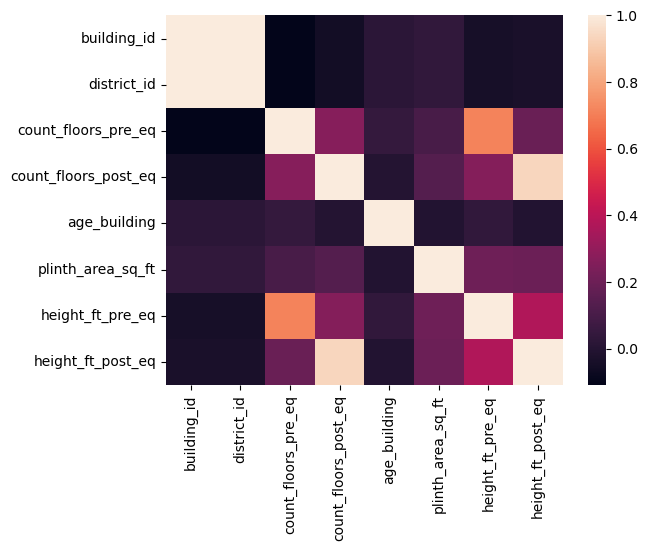

In [72]:
sns.heatmap(df.corr(numeric_only=True))

In [73]:
df.columns

Index(['building_id', 'district_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'condition_post_eq', 'damage_grade'],
      dtype='object')

In [74]:
# sns.pairplot(hue='damage_grade',data=df)

# Univariate Analysis

In [75]:
df.columns

Index(['building_id', 'district_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'condition_post_eq', 'damage_grade'],
      dtype='object')

In [76]:
df['damage_grade'].value_counts(normalize=True)*100

Grade 5    36.186305
Grade 4    24.123153
Grade 3    17.899347
Grade 2    11.449457
Grade 1    10.341737
Name: damage_grade, dtype: float64

<Axes: >

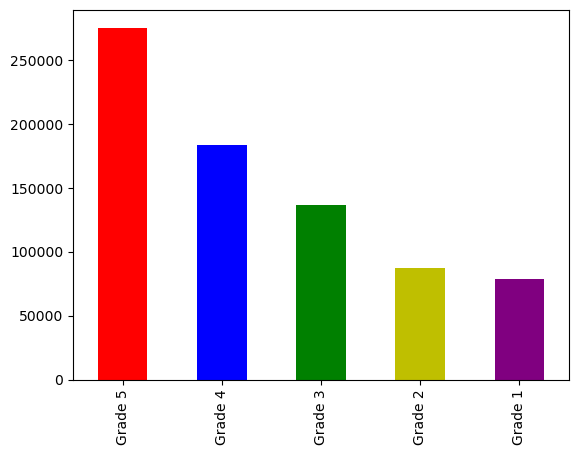

In [77]:
df['damage_grade'].value_counts().plot(kind='bar',color=['r','b','g','y','purple'],stacked=False,grid=False)

In [78]:
df['damage_grade'].value_counts(normalize=True)*100

Grade 5    36.186305
Grade 4    24.123153
Grade 3    17.899347
Grade 2    11.449457
Grade 1    10.341737
Name: damage_grade, dtype: float64

In [79]:
df.sample(3)

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
413938,249008001161,24,2,2,12,500,15,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 4
663895,313401012171,31,1,1,9,600,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,RC,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1
514088,300509020301,30,2,0,20,200,15,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Rubble clear,Grade 5


<Axes: >

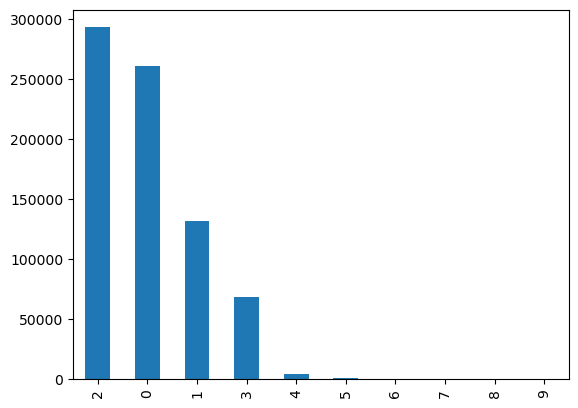

In [80]:
df['count_floors_post_eq'].value_counts().plot(kind='bar')

<Axes: >

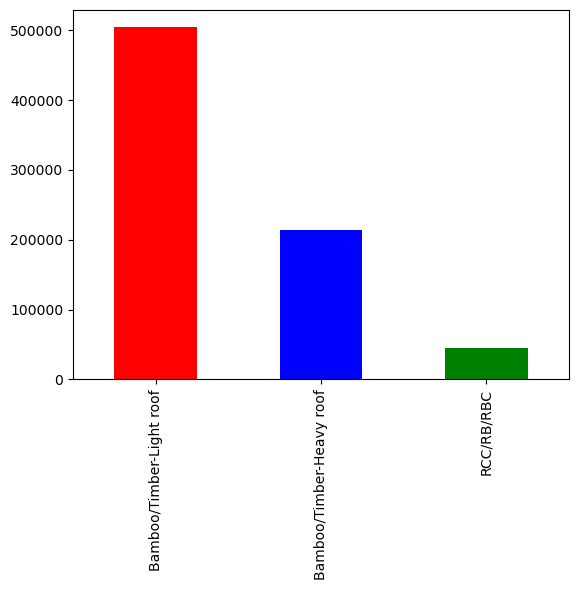

In [81]:
df['roof_type'].value_counts().plot(kind='bar',color=['r','b','g'])

<Axes: >

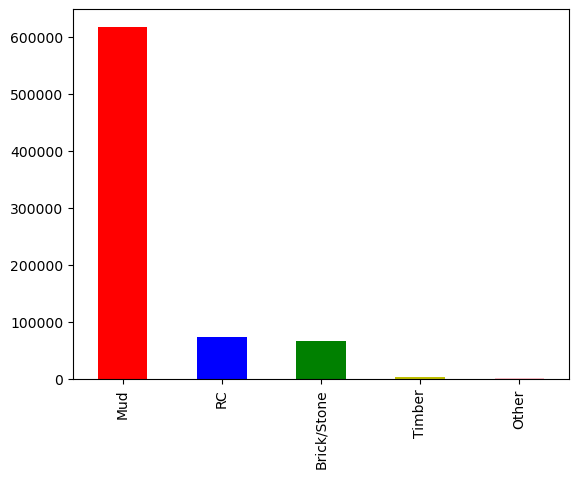

In [82]:
df['ground_floor_type'].value_counts().plot(kind='bar',color=['r','b','g','y','pink'])

<Axes: >

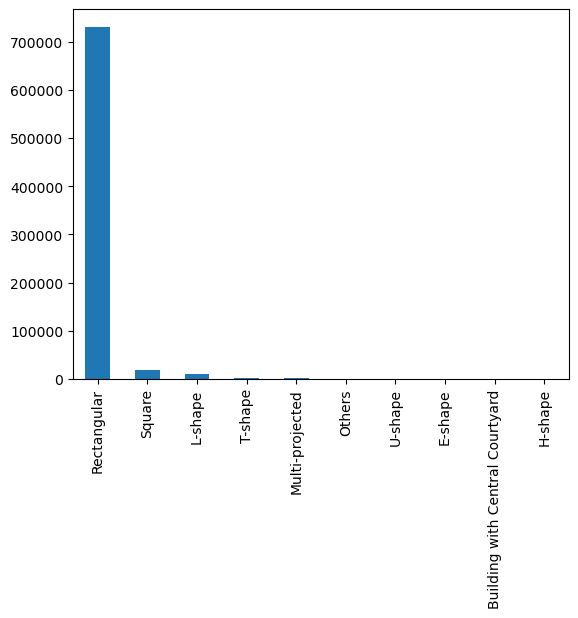

In [83]:
df['plan_configuration'].value_counts().plot(kind='bar')

<Axes: >

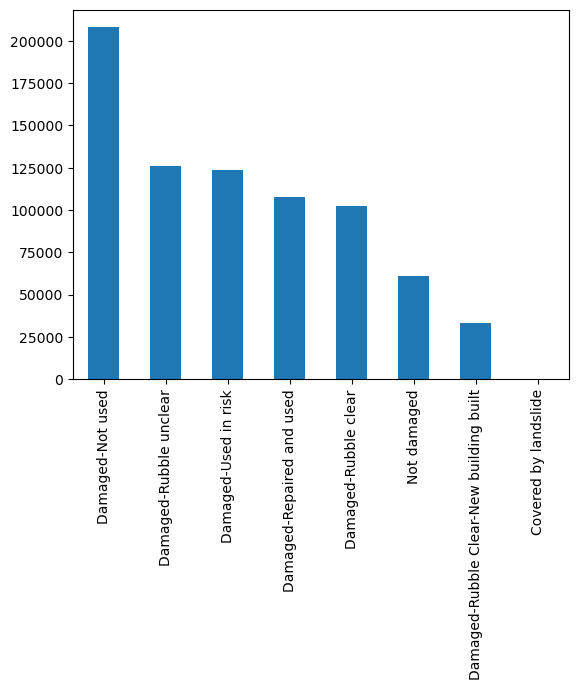

In [84]:
df['condition_post_eq'].value_counts().plot(kind='bar')

# Distribution Plot

In [85]:
df.columns

Index(['building_id', 'district_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'condition_post_eq', 'damage_grade'],
      dtype='object')

<Axes: ylabel='Count'>

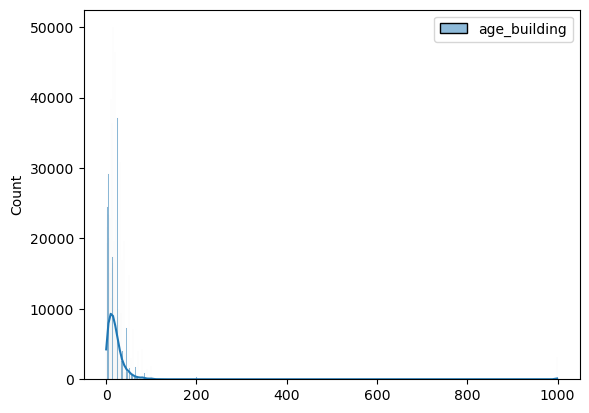

In [86]:
sns.histplot(df[['age_building']],kde=True)

<Axes: ylabel='Count'>

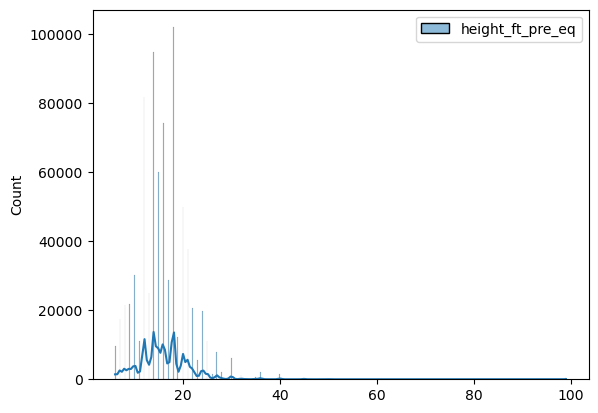

In [87]:
sns.histplot(df[['height_ft_pre_eq']],kde=True)

In [88]:
df['height_ft_pre_eq'].describe()

count    762106.000000
mean         16.049372
std           5.493878
min           6.000000
25%          12.000000
50%          16.000000
75%          18.000000
max          99.000000
Name: height_ft_pre_eq, dtype: float64

<Axes: ylabel='Count'>

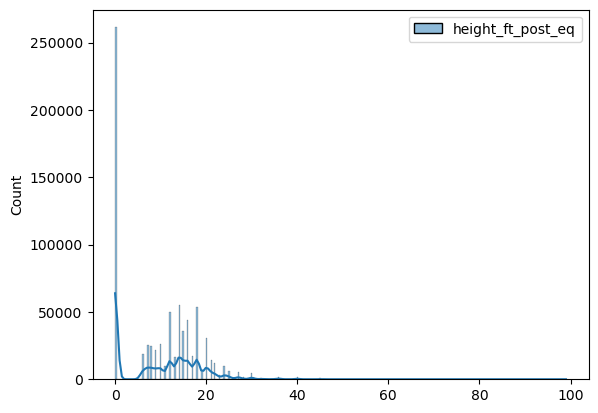

In [89]:
sns.histplot(df[['height_ft_post_eq']],kde=True)

In [90]:
# sns.FacetGrid(df[['height_ft_pre_eq','height_ft_post_eq']].convert_dtypes(),hue='height_ft_post_eq').map(sns.histplot,'height_ft_pre_eq').add_legend()

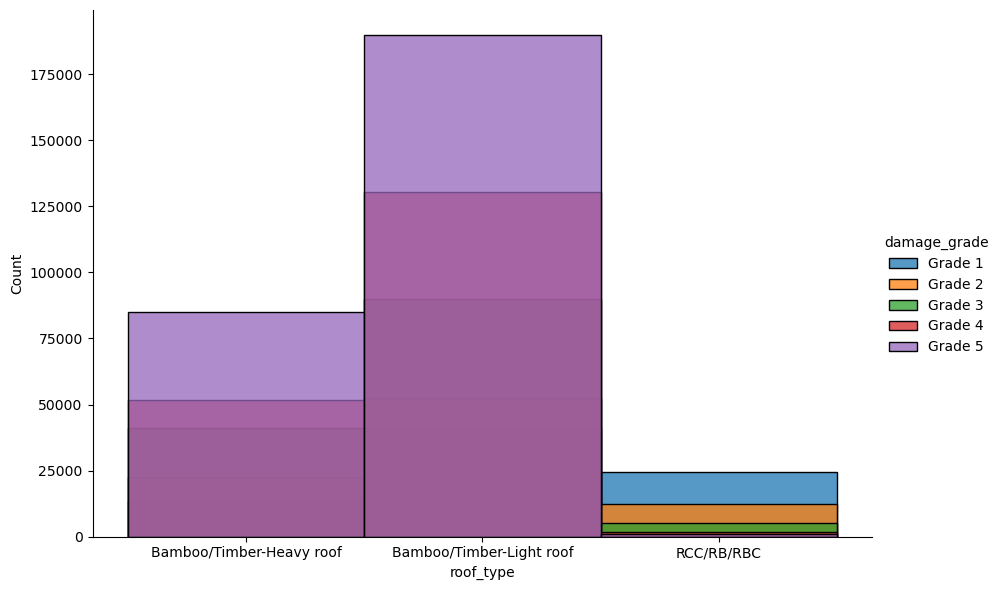

In [91]:
sns.FacetGrid(df[['roof_type','damage_grade']].convert_dtypes(),hue='damage_grade',height=6, aspect=1.5).map(sns.histplot,'roof_type').add_legend()

In [92]:
df.columns

Index(['building_id', 'district_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'condition_post_eq', 'damage_grade'],
      dtype='object')

# CDF and PDF

[  0.   99.9 199.8 299.7 399.6 499.5 599.4 699.3 799.2 899.1 999. ]


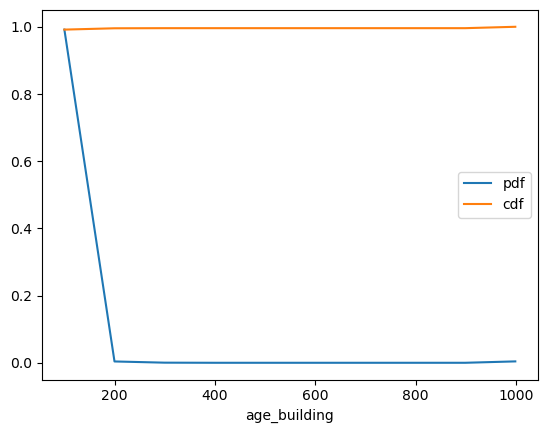

In [93]:
df['age_building']=df['age_building'].astype(int)
counts,bin_edges=np.histogram(df['age_building'],bins=10,density=True)
print(bin_edges)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('age_building')
plt.legend()

# Multivariate Analysis

In [94]:
df.sample()

,building_id,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade
619024,311605000061,31,2,2,20,400,15,15,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Repaired and used,Grade 2


In [95]:
#lets us see the analysis between two variable
as_df=pd.crosstab(df['roof_type'],df['damage_grade'],margins=True)

<Axes: title={'center': 'roof_type analysis per damage_grade '}, xlabel='roof_type'>

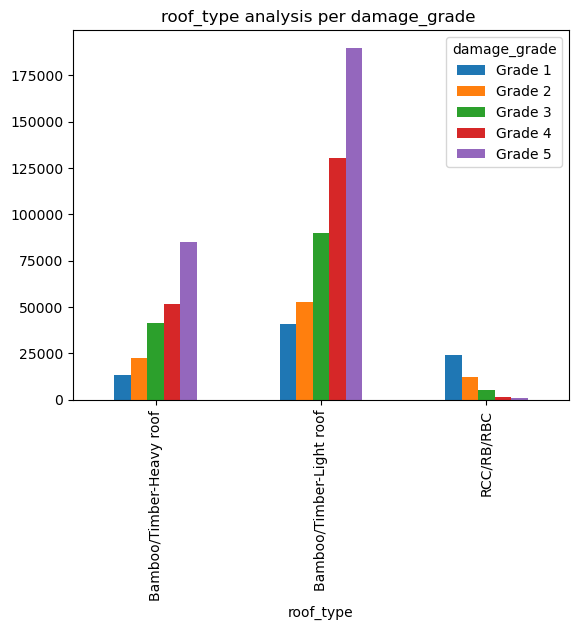

In [96]:
as_df.iloc[:-1,:-1].plot(kind='bar',stacked=False,grid=False,title='roof_type analysis per damage_grade ')

In [97]:
df.columns

Index(['building_id', 'district_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'condition_post_eq', 'damage_grade'],
      dtype='object')

In [98]:
foundation=pd.crosstab(df['foundation_type'],df['damage_grade'],margins=True)
foundation

damage_grade,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,All
foundation_type,,,,,,
Bamboo/Timber,17201,13357,13244,8368,5303,57473
Cement-Stone/Brick,11642,8847,7104,5621,6031,39245
Mud mortar-Stone/Brick,29484,56044,112442,168458,262288,628716
Other,1364,405,459,691,1633,4552
RC,19124,8604,3163,706,523,32120
All,78815,87257,136412,183844,275778,762106


<Axes: title={'center': 'Foundation_type vs damage_grade'}, xlabel='foundation_type'>

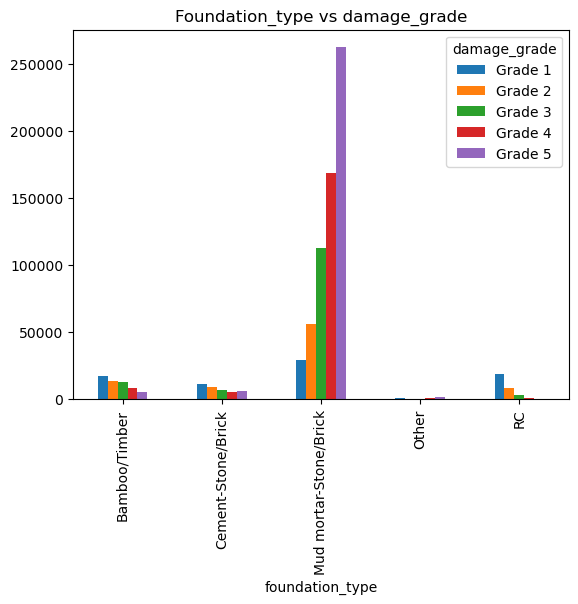

In [99]:
foundation.iloc[:-1,:-1].plot(kind='bar',stacked=False,grid=False,title='Foundation_type vs damage_grade')

In [100]:
floor=pd.crosstab(df['count_floors_pre_eq'],df['damage_grade'],margins=True)
floor

damage_grade,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,All
count_floors_pre_eq,,,,,,
1,30774,21147,18018,15630,33332,118901
2,37917,54233,93555,120727,161681,468113
3,6859,10271,23613,46332,79918,166993
4,2238,1153,965,1005,724,6085
5,811,336,194,135,93,1569
6,171,87,44,9,21,332
7,36,26,19,2,5,88
8,5,3,1,2,1,12
9,4,1,3,2,3,13


<Axes: xlabel='count_floors_pre_eq'>

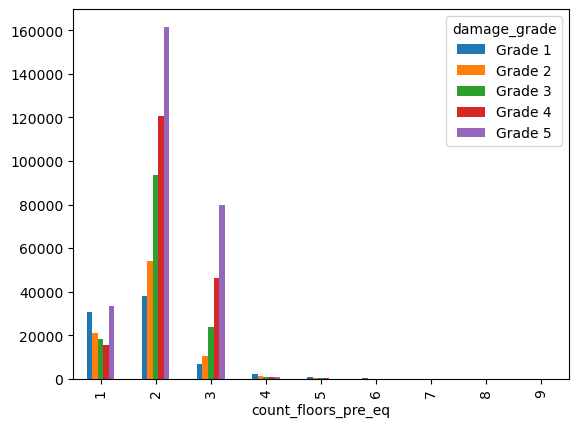

In [101]:
floor.iloc[:-1,:-1].plot(kind='bar',stacked=False,grid=False)

In [102]:
df.columns

Index(['building_id', 'district_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'condition_post_eq', 'damage_grade'],
      dtype='object')

In [103]:
df['age_building'].unique()

array([  9,  15,  20,  30,  18,  13,   8,  22,  10,   3,   2,   7,  50,
        29,  25,  14,  23,  40,   1,  82,  35,  60,  45,  11,  32,  16,
        27,  12,  65,  33,   4,  24,  47,  99,   5,  70,  80,  44,  75,
        21,   6,  17,  58,  57,  19,  26,  28,  95,  90,  71,  55,  39,
        48,  42,  85,   0,  38,  52,  56,  59,  84,  46,  68, 105,  51,
        41,  62,  61,  36,  34,  78, 100,  54,  72,  31,  43,  37,  49,
        81,  53,  69, 187, 999,  66,  63, 102,  87,  79, 140,  88,  64,
       120,  93, 115,  86, 130, 160,  92,  77,  73,  67,  83,  76, 101,
       110, 176,  74, 200, 190, 150, 111, 119,  96,  98,  94,  91,  89,
       125, 167,  97, 123, 103, 180, 112, 133, 116, 145, 114, 121, 144,
       108, 122, 155, 172, 132, 131, 106, 148, 113, 109, 165, 118, 117,
       107, 170, 104, 162, 152, 127, 151, 146, 196, 126, 175, 138, 141,
       178, 128, 149, 164, 199, 135, 166, 168, 156, 161, 142, 185, 173,
       136, 177, 174, 124, 134, 193, 195])

In [104]:
df.columns

Index(['building_id', 'district_id', 'count_floors_pre_eq',
       'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
       'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'condition_post_eq', 'damage_grade'],
      dtype='object')

In [105]:
mul=pd.crosstab([df['ground_floor_type'],df['other_floor_type']],df['damage_grade'],margins=True)

<Axes: xlabel='ground_floor_type,other_floor_type'>

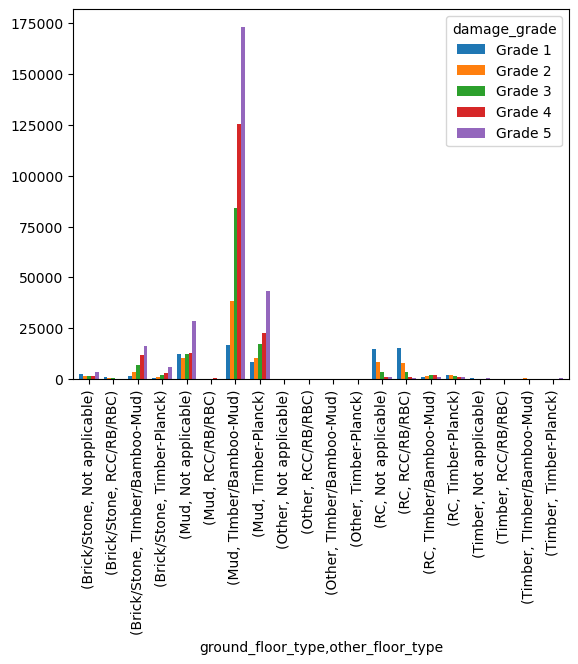

In [106]:
mul.iloc[:-1,:-1].plot(kind='bar',width=0.8)